<a href="https://colab.research.google.com/github/jessewilliamfreeman/cs480student/blob/main/01/Jesse_Freeman_CS480_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

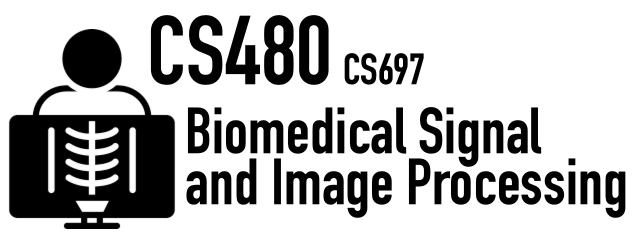
# Assignment 1


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset

In [3]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

In [4]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds

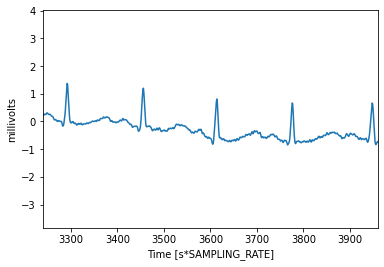

In [5]:
plt.xlim(9 * SAMPLING_RATE, 11 * SAMPLING_RATE)
plt.xlabel('Time [s*SAMPLING_RATE]')
plt.ylabel('millivolts')
plt.plot(ecg)

**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [6]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [7]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk

     |████████████████████████████████| 993kB 8.2MB/s 


In [8]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [ ]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880]


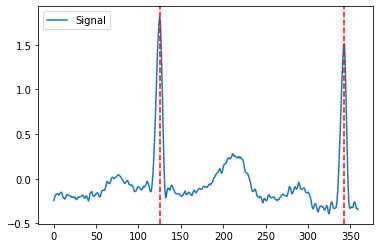

In [ ]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

In [ ]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1

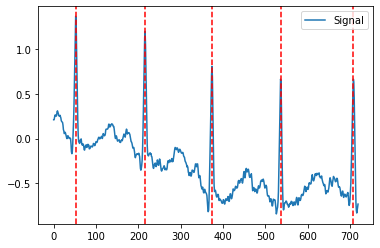

In [34]:
ecg_peaks = rpeaks['ECG_R_Peaks']
ecg_peaks = ecg_peaks[ecg_peaks > 9 * SAMPLING_RATE]
ecg_peaks = ecg_peaks[ecg_peaks < 11 * SAMPLING_RATE]
ecg_peaks = ecg_peaks - SAMPLING_RATE * 9
plot2 = nk.events_plot(ecg_peaks, ecg[SAMPLING_RATE * 9:SAMPLING_RATE * 11] )

**Task 3:** Detect Heartrate. [15 Points]

In [ ]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 

In [55]:
from statistics import mean
average_size = []
for i in range(1, rpeaks['ECG_R_Peaks'].size):
  average_size.append(rpeaks['ECG_R_Peaks'][i] - rpeaks['ECG_R_Peaks'][i-1])
print("Min Heart Rate: " + str(60/(max(average_size) / SAMPLING_RATE)) + " Beats Per Minute ")
print("Max Heart Rate: " + str(60/(min(average_size) / SAMPLING_RATE)) + " Beats Per Minute ")
print("Mean Heart Rate: " + str(60/(mean(average_size) / SAMPLING_RATE)) + " Beats Per Minute ")

Min Heart Rate: 14.285714285714285 Beats Per Minute 
Max Heart Rate: 144.96644295302013 Beats Per Minute 
Mean Heart Rate: 100.93457943925233 Beats Per Minute 


In [ ]:
# It looks like there is one moment where the heart skipped some beats, the heart beat is at least somewhat irregular.

**Task 4:** Detect P Q S T Peaks. [25 Points]

In [ ]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)

In [ ]:
# TODO Does the detection work well?

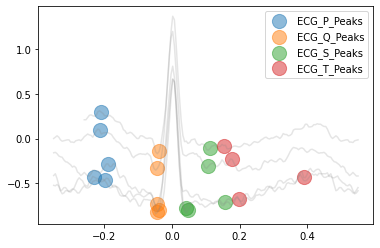

In [100]:
_, waves_peak = nk.ecg_delineate(ecg[SAMPLING_RATE * 9:SAMPLING_RATE * 11], ecg_peaks, sampling_rate=1000/5, show=True, show_type='peaks')

In [72]:
# it looks like the kit has an issue finding the T peaks, also the grouping is pretty loose.

**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

In [ ]:
# TODO Does the filtering improve the result?

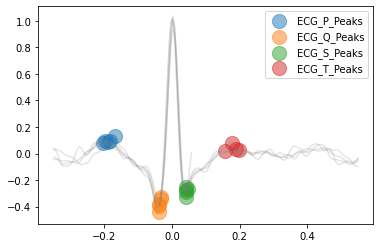

In [116]:
filtered_signal = nk.signal_filter(ecg[SAMPLING_RATE * 9:SAMPLING_RATE * 11], 
                                   sampling_rate=SAMPLING_RATE,
                                   lowcut=7,
                                   highcut=50)

_, waves_peak_filter = nk.ecg_delineate(
    filtered_signal, 
    ecg_peaks, 
    sampling_rate=1000/5, 
    show=True)

In [ ]:
# Yes the filtering cleaned up the signal and allowed for the ecg_delineate function to better detect the P Q S T peaks.

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#